In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
def dataset_description(df):

    dataset_head = df.head()
    dataset_describe = df.describe()
    numSamples = df.shape[0]
    num_features = df.shape[1]

    feature_info = df.dtypes

    print(f"Number of samples: {numSamples}")
    print(f"Number of features: {num_features}")
    print(feature_info)

    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)

    print("\nDataset Head:")
    print(dataset_head)

    print("\nDataset Describe:")
    print(dataset_describe)



#Used from Assignment 1's pre-processing diamonds part

In [4]:
df = pd.read_csv("dataset.csv")
dataset_description(df)



Number of samples: 766
Number of features: 8
f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

Missing Values:
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

Dataset Head:
  f1   f2  f3  f4   f5    f6     f7  target
0  6  148  72  35    0  33.6  0.627       1
1  1   85  66  29    0  26.6  0.351       0
2  8  183  64   0    0  23.3  0.672       1
3  1   89  66  23   94  28.1  0.167       0
4  0  137  40  35  168  43.1  2.288       1

Dataset Describe:
               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000


In [5]:
f1_unique = df['f1'].unique()
f2_unique = df['f2'].unique()
f3_unique = df['f3'].unique()
f4_unique = df['f4'].unique()
f5_unique = df['f5'].unique()
f6_unique = df['f6'].unique()
f7_unique = df['f7'].unique()
target_unique = df['target'].unique()

In [6]:
f1_unique, f2_unique, f3_unique, f4_unique, f5_unique, f6_unique, f7_unique, target_unique

(array(['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', '9', '11', '13',
        '15', '17', '12', '14', 'c'], dtype=object),
 array(['148', '85', '183', '89', '137', '116', '78', '115', '197', '125',
        '110', '168', '139', '189', '166', '100', '118', '107', '103',
        '126', '99', '196', '119', '143', '147', '97', '145', '117', '109',
        '158', '88', '92', '122', '138', '102', '90', '111', '180', '133',
        '106', '171', '159', '146', '71', '105', '101', '176', '150', '73',
        '187', '84', '44', '141', '114', '95', '129', '79', '0', '62',
        '131', '112', '113', '74', '83', '136', '80', '123', '81', '134',
        '142', '144', '93', '163', '151', '96', '155', '76', '160', '124',
        '162', '132', '120', '173', '170', '128', '108', '154', '57',
        '156', '153', '188', '152', '104', '87', '75', '179', '130', '194',
        '181', '135', '184', '140', '177', '164', '91', '165', '86', '193',
        '191', '161', '167', '77', '182', '157', '178', 

In [7]:
df = df.replace({'f1': {'c': None},
                 'f2': {'f': None},
                 'f4': {'a': None},
                 'f5': {'b': None},
                 'f6': {'d': None},
                 'f7': {'e': None}})

df.isnull().sum()


f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [8]:
print(df.dtypes)

int_columns = ['f1', 'f2', 'f4', 'f5']
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

float_columns = ['f6', 'f7']
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object


In [9]:
df.fillna(df.mean(), inplace=True)

print(df.isnull().sum())

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [10]:
print(df.dtypes)

f1        float64
f2        float64
f3          int64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object


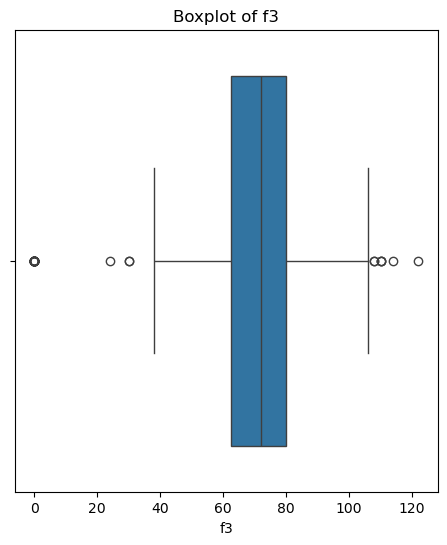

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['f3'])
plt.xlabel('f3')
plt.title('Boxplot of f3')



plt.show()


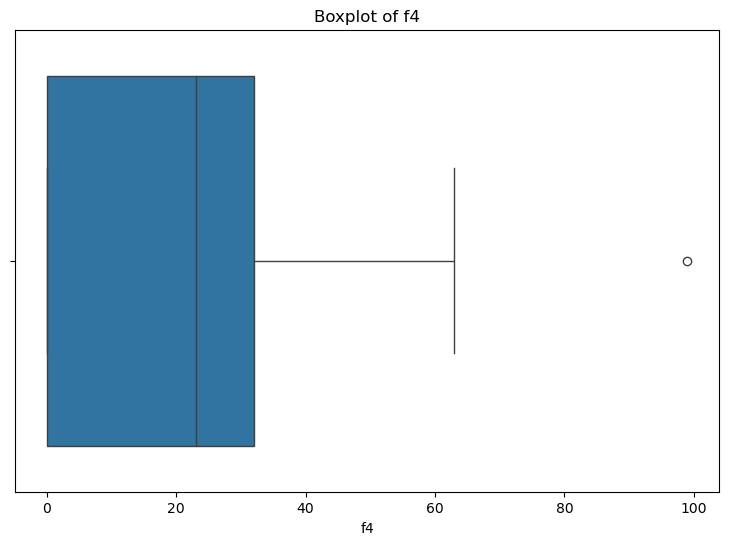

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
sns.boxplot(x=df['f4'])
plt.xlabel('f4')
plt.title('Boxplot of f4')

plt.show()

In [13]:
print("Printed Box Plot to get a gist of how many outliers are there")

Printed Box Plot to get a gist of how many outliers are there


In [14]:
#Used from assignment 1
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def handle_outliers(df, column, method='remove'):
    outliers = detect_outliers(df, column)
    num_outliers = len(outliers)
    print(f"Number of {column} outliers: {num_outliers}")

    if method == 'remove':
        df = df[~df.index.isin(outliers.index)]
    elif method == 'mean':
        df.loc[outliers.index, column] = df[column].mean()
    elif method == 'median':
        df.loc[outliers.index, column] = df[column].median()
    elif method == 'mode':
        df.loc[outliers.index, column] = df[column].mode()[0]
    return df

In [15]:
df = handle_outliers(df, 'f3', method='mean')
df = handle_outliers(df, 'f4', method='mean')

Number of f3 outliers: 45
Number of f4 outliers: 1


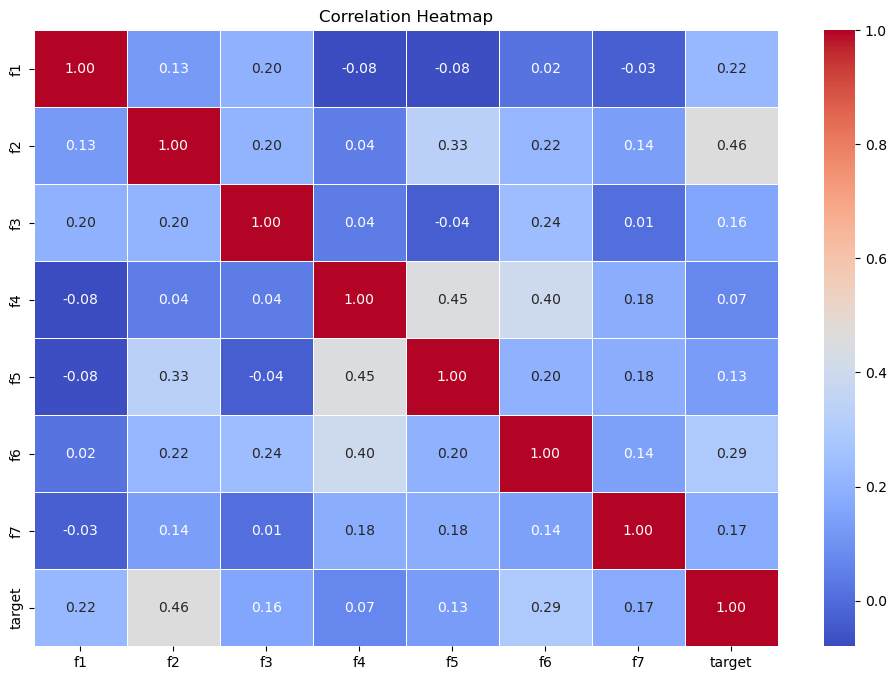

This graph visualizes the correlation between different features in the dataset. The heatmap helps identify strong positive or negative relationships between features, which can provide insights into which features are more closely related and might influence each other. 


In [16]:
def calculate_correlation_and_plot_heatmap(df):
    correlation_matrix = df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

calculate_correlation_and_plot_heatmap(df)
print("This graph visualizes the correlation between different features in the dataset. The heatmap helps identify strong positive or negative relationships between features, which can provide insights into which features are more closely related and might influence each other. ")

#Used from Assignment 1

In [17]:
df = df.drop(columns=['f4'])

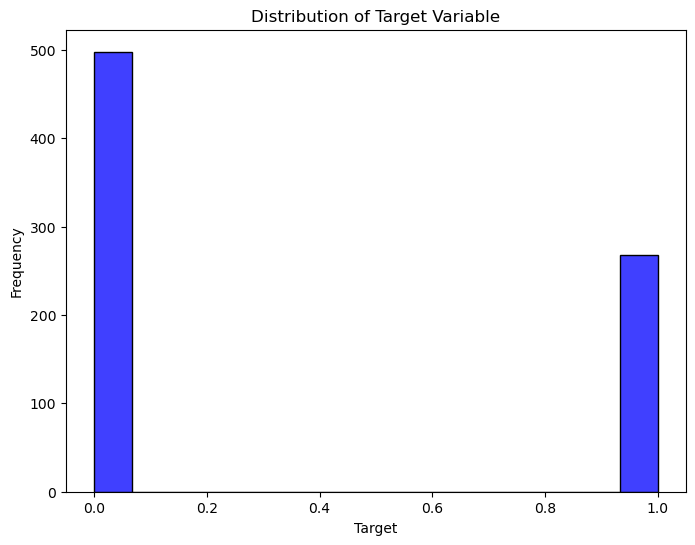

This histogram represents the distribution of the 'target' variable in the dataset. It illustrates the frequency of the target values, which are '0' and '1'.


In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=15, color='blue')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

print("This histogram represents the distribution of the 'target' variable in the dataset. It illustrates the frequency of the target values, which are '0' and '1'.")

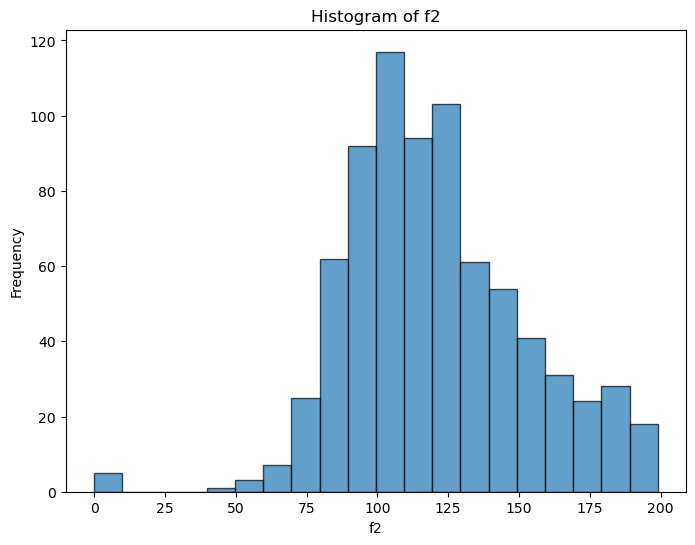

This histogram displays the distribution of the 'f2' feature. It shows how frequently different values of 'f2' occur in the dataset.


In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['f2'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.title('Histogram of f2')
plt.show()

print("This histogram displays the distribution of the 'f2' feature. It shows how frequently different values of 'f2' occur in the dataset.")

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import random


def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True  # For reproducibility
    torch.backends.cudnn.benchmark = False

set_seed(44)

X = df.drop(columns=['target']).astype(float)
y = df['target'].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=44)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=44)
(X_train.shape, X_val.shape, X_test.shape)

((613, 6), (76, 6), (77, 6))

In [22]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.output = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.leaky_relu(self.batchnorm1(self.fc1(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.batchnorm2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.output(x))
        return x

input_size = X.shape[1]
model = SimpleNN(input_size)

In [24]:
from torchinfo import summary

summary(model, input_size=(1, input_size))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleNN                                 [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   448
├─BatchNorm1d: 1-2                       [1, 64]                   128
├─Dropout: 1-3                           [1, 64]                   --
├─Linear: 1-4                            [1, 64]                   4,160
├─BatchNorm1d: 1-5                       [1, 64]                   128
├─Dropout: 1-6                           [1, 64]                   --
├─Linear: 1-7                            [1, 1]                    65
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

In [25]:
lossFunction = nn.BCELoss()
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [26]:
import time

epochs = 200
batchSize = 32

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []


numSamples = X_train.shape[0]
num_batches = int(numSamples / batchSize) + (1 if numSamples % batchSize != 0 else 0)

val_samples = X_val.shape[0]
val_batches = int(val_samples / batchSize) + (1 if val_samples % batchSize != 0 else 0)

bestVal_loss = float('inf')
bestModel_state = None

timeStart = time.time()

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    correctly_trained = 0
    total_train = 0

    for batch in range(num_batches):
        startPoint = batch * batchSize
        endPoint = startPoint + batchSize
        if endPoint > numSamples:
            endPoint = numSamples

        inputs = X_train[startPoint:endPoint]
        labels = y_train[startPoint:endPoint].unsqueeze(1)

        outputs = model(inputs)
        loss = lossFunction(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        predictions = torch.round(outputs)
        correctly_trained += (predictions == labels).sum().item()
        total_train += labels.size(0)

    epoch_loss /= numSamples
    train_accuracy = correctly_trained / total_train

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_batch in range(val_batches):
            val_startPoint = val_batch * batchSize
            val_endPoint = val_startPoint + batchSize
            if val_endPoint > val_samples:
                val_endPoint = val_samples

            val_inputs = X_val[val_startPoint:val_endPoint]
            val_labels = y_val[val_startPoint:val_endPoint].unsqueeze(1)

            val_outputs = model(val_inputs)
            v_loss = lossFunction(val_outputs, val_labels)
            val_loss += v_loss.item() * val_inputs.size(0)

            val_predictions = torch.round(val_outputs)
            correct_val += (val_predictions == val_labels).sum().item()
            total_val += val_labels.size(0)

    val_loss /= val_samples
    val_accuracy = correct_val / total_val

    test_loss_epoch = 0.0
    correct_test_epoch = 0
    total_test_epoch = 0
    with torch.no_grad():
        test_batches = int(X_test.shape[0] / batchSize) + (1 if X_test.shape[0] % batchSize != 0 else 0)
        for test_batch in range(test_batches):
            test_startPoint = test_batch * batchSize
            test_endPoint = test_startPoint + batchSize
            if test_endPoint > X_test.shape[0]:
                test_endPoint = X_test.shape[0]

            test_inputs = X_test[test_startPoint:test_endPoint]
            test_labels_batch = y_test[test_startPoint:test_endPoint].unsqueeze(1)

            test_outputs = model(test_inputs)
            t_loss = lossFunction(test_outputs, test_labels_batch)
            test_loss_epoch += t_loss.item() * test_inputs.size(0)

            test_predictions = torch.round(test_outputs)
            correct_test_epoch += (test_predictions == test_labels_batch).sum().item()
            total_test_epoch += test_labels_batch.size(0)

    test_loss_epoch /= X_test.shape[0]
    test_accuracy_epoch = correct_test_epoch / total_test_epoch

    train_losses.append(epoch_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss_epoch)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy_epoch)

    if val_loss < bestVal_loss:
        bestVal_loss = val_loss
        bestModel_state = model.state_dict()

    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {epoch_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Test Loss: {test_loss_epoch:.4f}, '
          f'Train Acc: {train_accuracy:.4f}, '
          f'Val Acc: {val_accuracy:.4f}, '
          f'Test Acc: {test_accuracy_epoch:.4f}')

end_time = time.time()
elapsed_time = end_time - timeStart
print(f'Training completed in {elapsed_time/60:.2f} minutes.')



Epoch 1/200, Train Loss: 0.6906, Val Loss: 0.6422, Test Loss: 0.6474, Train Acc: 0.5840, Val Acc: 0.6974, Test Acc: 0.7403
Epoch 2/200, Train Loss: 0.6455, Val Loss: 0.6192, Test Loss: 0.6156, Train Acc: 0.6444, Val Acc: 0.6842, Test Acc: 0.7403
Epoch 3/200, Train Loss: 0.6310, Val Loss: 0.6023, Test Loss: 0.5949, Train Acc: 0.6705, Val Acc: 0.6974, Test Acc: 0.7532
Epoch 4/200, Train Loss: 0.6128, Val Loss: 0.5906, Test Loss: 0.5833, Train Acc: 0.6917, Val Acc: 0.7237, Test Acc: 0.7403
Epoch 5/200, Train Loss: 0.6157, Val Loss: 0.5775, Test Loss: 0.5690, Train Acc: 0.6705, Val Acc: 0.7237, Test Acc: 0.7403
Epoch 6/200, Train Loss: 0.5976, Val Loss: 0.5741, Test Loss: 0.5669, Train Acc: 0.6982, Val Acc: 0.7237, Test Acc: 0.7662
Epoch 7/200, Train Loss: 0.5706, Val Loss: 0.5615, Test Loss: 0.5536, Train Acc: 0.7145, Val Acc: 0.7105, Test Acc: 0.7792
Epoch 8/200, Train Loss: 0.5808, Val Loss: 0.5556, Test Loss: 0.5485, Train Acc: 0.7113, Val Acc: 0.7105, Test Acc: 0.7922
Epoch 9/200, Tra

In [27]:
model_save_path = 'best_model_part1.pth'
torch.save(bestModel_state, model_save_path)
print(f'Best model weights saved to {model_save_path}')

model.eval()

Best model weights saved to best_model_part1.pth


SimpleNN(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [28]:
all_test_outputs = []
all_test_labels = []

test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    test_batches = int(X_test.shape[0] / batchSize) + (1 if X_test.shape[0] % batchSize != 0 else 0)
    for test_batch in range(test_batches):
        test_startPoint = test_batch * batchSize
        test_endPoint = test_startPoint + batchSize
        if test_endPoint > X_test.shape[0]:
            test_endPoint = X_test.shape[0]

        test_inputs = X_test[test_startPoint:test_endPoint]
        test_labels_batch = y_test[test_startPoint:test_endPoint].unsqueeze(1)

        test_outputs = model(test_inputs)
        t_loss = lossFunction(test_outputs, test_labels_batch)
        test_loss += t_loss.item() * test_inputs.size(0)

        all_test_outputs.append(test_outputs.detach())
        all_test_labels.append(test_labels_batch.detach())

        test_predictions = torch.round(test_outputs)
        correct_test += (test_predictions == test_labels_batch).sum().item()
        total_test += test_labels_batch.size(0)

test_loss /= X_test.shape[0]
test_accuracy = correct_test / total_test

all_test_outputs = torch.cat(all_test_outputs).squeeze().numpy()
all_test_labels = torch.cat(all_test_labels).squeeze().numpy()

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(all_test_labels, np.round(all_test_outputs), average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Loss: 0.4633
Test Accuracy: 80.52%
Precision: 0.7200
Recall: 0.6923
F1 Score: 0.7059


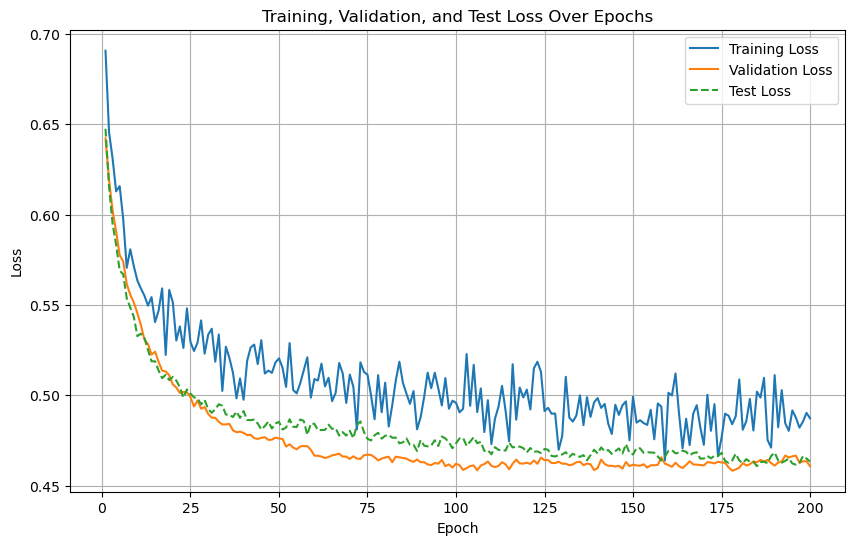

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


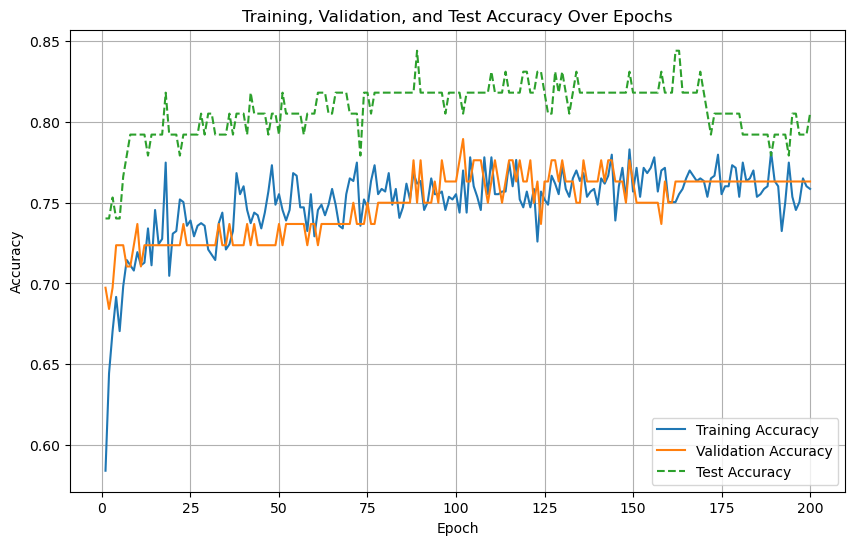

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


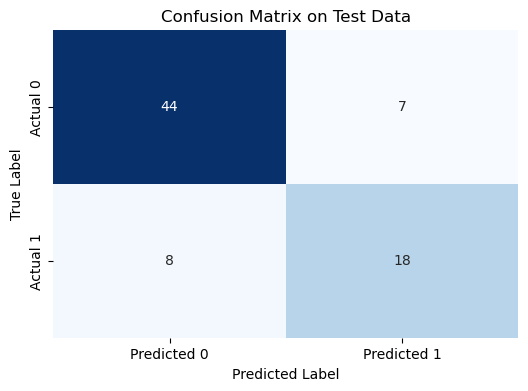

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

predictions = np.round(all_test_outputs)

TP = np.sum((predictions == 1) & (all_test_labels == 1))
TN = np.sum((predictions == 0) & (all_test_labels == 0))
FP = np.sum((predictions == 1) & (all_test_labels == 0))
FN = np.sum((predictions == 0) & (all_test_labels == 1))

confusion_matrix = np.array([[TN, FP],
                             [FN, TP]])

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')
plt.show()


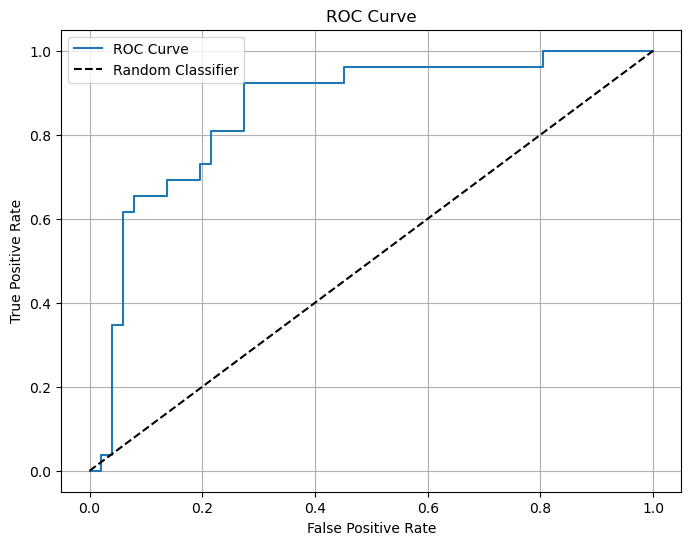

In [32]:

from torchmetrics import ROC




all_test_outputs = torch.tensor(all_test_outputs)  
all_test_labels = torch.tensor(all_test_labels).long()  


roc_metric = ROC(task="binary")

fpr, tpr, thresholds = roc_metric(all_test_outputs, all_test_labels)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()



Part 2 Starts

Dropout Optimization

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score



class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.leaky_relu(self.batchnorm1(self.fc1(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.batchnorm2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.output(x))
        return x



def evaluate(model, data_loader):
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_inputs, val_labels in data_loader:
            val_outputs = model(val_inputs).squeeze()
            val_predicted = torch.round(val_outputs).float()
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
    val_accuracy = val_correct / val_total
    return val_accuracy

def train_and_evaluate(model, train_loader, val_loader, test_loader , num_epochs=100 , lr = 0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_accuracy = 0.0
    best_epoch = 0
    next_epoch_accuracy = 0.0
    next_epoch_recorded = False

    next_epoch = 0

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_correct = 0
        train_total = 0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predicted = torch.round(outputs)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_accuracy = train_correct / train_total
        train_accuracies.append(train_accuracy)
        val_accuracy = evaluate(model, val_loader)
        val_accuracies.append(val_accuracy)
        test_accuracy = evaluate(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}, Train Acc: {train_accuracy:.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")


        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = model.state_dict().copy()
            next_epoch_recorded = False     

        elif not next_epoch_recorded and epoch == best_epoch + 1:
            next_epoch_accuracy = val_accuracy
            next_epoch_recorded = True

    return best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
           train_accuracies, val_accuracies, test_accuracies


def test_accuracy(model, test_loader):
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = model(test_inputs).squeeze()
            test_predicted = torch.round(test_outputs)
            test_total += test_labels.size(0)
            test_correct += (test_predicted == test_labels).sum().item()
    test_accuracy = test_correct / test_total
    return test_accuracy

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size = 32)



In [34]:
dropout_rates = [0.3, 0.5, 0.7]
results = []

for dr in dropout_rates:
    set_seed(44)
    model = SimpleNN(input_size=6, hidden_size=64, dropout_rate=dr)

    best_epoch, best_accuracy, next_epoch_accuracy, best_model_state, \
    train_accuracies, val_accuracies, test_accuracies = train_and_evaluate(
        model, train_loader, val_loader, test_loader, num_epochs=400)

    model.load_state_dict(best_model_state)
    test_acc = test_accuracy(model, test_loader)

    results.append({
        'dropout_rate': dr,
        'best_epoch': best_epoch,
        'best_val_accuracy': best_accuracy,
        'next_epoch_val_accuracy': next_epoch_accuracy,
        'test_accuracy': test_acc,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracies': test_accuracies
    })


Epoch 1/400, Train Acc: 0.6509, Val Acc: 0.7632, Test Acc: 0.7792
Epoch 2/400, Train Acc: 0.7259, Val Acc: 0.7632, Test Acc: 0.7922
Epoch 3/400, Train Acc: 0.7635, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 4/400, Train Acc: 0.7553, Val Acc: 0.7763, Test Acc: 0.7792
Epoch 5/400, Train Acc: 0.7439, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 6/400, Train Acc: 0.7553, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 7/400, Train Acc: 0.7537, Val Acc: 0.7895, Test Acc: 0.7922
Epoch 8/400, Train Acc: 0.7553, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 9/400, Train Acc: 0.7586, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 10/400, Train Acc: 0.7684, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 11/400, Train Acc: 0.7700, Val Acc: 0.7237, Test Acc: 0.8052
Epoch 12/400, Train Acc: 0.7455, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 13/400, Train Acc: 0.7553, Val Acc: 0.7237, Test Acc: 0.8052
Epoch 14/400, Train Acc: 0.7488, Val Acc: 0.7237, Test Acc: 0.7922
Epoch 15/400, Train Acc: 0.7504, Val Acc: 0.7105, Test Acc: 0.7922
Epoc

In [35]:
print("Dropout Rate Tuning Results:")
print("Dropout Rate | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy")
for result in results:
    print(f"{result['dropout_rate']:.2f} | {result['best_epoch']} | {result['best_val_accuracy']:.4f} | "
          f"{result['next_epoch_val_accuracy']:.4f} | {result['test_accuracy']:.4f}")


Dropout Rate Tuning Results:
Dropout Rate | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy
0.30 | 102 | 0.8026 | 0.7763 | 0.7662
0.50 | 25 | 0.7895 | 0.7105 | 0.7922
0.70 | 45 | 0.7763 | 0.7632 | 0.8182


Dropout rate 0.7

STEP 2 - 
Learning Rate,
Hidden Size,
Optimizer



In [36]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
results_lr = []

for lr in learning_rates:
    set_seed(44)
    model = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)

    best_epoch, best_accuracy, next_epoch_accuracy, best_model_state, \
    train_accuracies, val_accuracies, test_accuracies = train_and_evaluate(
        model, train_loader, val_loader, test_loader, num_epochs=400, lr=lr)

    model.load_state_dict(best_model_state)
    test_acc = test_accuracy(model, test_loader)

    results_lr.append({
        'learning_rate': lr,
        'best_epoch': best_epoch,
        'best_val_accuracy': best_accuracy,
        'next_epoch_val_accuracy': next_epoch_accuracy,
        'test_accuracy': test_acc,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracies': test_accuracies
    })


Epoch 1/400, Train Acc: 0.5318, Val Acc: 0.7632, Test Acc: 0.7143
Epoch 2/400, Train Acc: 0.5253, Val Acc: 0.7368, Test Acc: 0.7273
Epoch 3/400, Train Acc: 0.5481, Val Acc: 0.7368, Test Acc: 0.7013
Epoch 4/400, Train Acc: 0.5498, Val Acc: 0.7632, Test Acc: 0.7403
Epoch 5/400, Train Acc: 0.5285, Val Acc: 0.7500, Test Acc: 0.7403
Epoch 6/400, Train Acc: 0.5938, Val Acc: 0.7500, Test Acc: 0.7532
Epoch 7/400, Train Acc: 0.5808, Val Acc: 0.7368, Test Acc: 0.7532
Epoch 8/400, Train Acc: 0.5808, Val Acc: 0.7237, Test Acc: 0.7922
Epoch 9/400, Train Acc: 0.6052, Val Acc: 0.7105, Test Acc: 0.8052
Epoch 10/400, Train Acc: 0.5987, Val Acc: 0.7368, Test Acc: 0.7662
Epoch 11/400, Train Acc: 0.6117, Val Acc: 0.7368, Test Acc: 0.7662
Epoch 12/400, Train Acc: 0.5856, Val Acc: 0.7237, Test Acc: 0.7662
Epoch 13/400, Train Acc: 0.6232, Val Acc: 0.7237, Test Acc: 0.7792
Epoch 14/400, Train Acc: 0.5824, Val Acc: 0.7368, Test Acc: 0.7922
Epoch 15/400, Train Acc: 0.6199, Val Acc: 0.7368, Test Acc: 0.7922
Epoc

In [37]:
print("Learning Rate Tuning Results:")
print("Learning Rate | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy")
for result in results_lr:
    print(f"{result['learning_rate']:.4f} | {result['best_epoch']} | {result['best_val_accuracy']:.4f} | "
          f"{result['next_epoch_val_accuracy']:.4f} | {result['test_accuracy']:.4f}")


Learning Rate Tuning Results:
Learning Rate | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy
0.0001 | 67 | 0.7763 | 0.7500 | 0.7792
0.0010 | 45 | 0.7763 | 0.7632 | 0.8182
0.0100 | 4 | 0.7763 | 0.7500 | 0.8182
0.1000 | 44 | 0.7763 | 0.7237 | 0.8182


Learning Rate - 0.01

In [38]:
hidden_sizes = [32, 64, 128]
results_hs = []

for hs in hidden_sizes:
    set_seed(44)
    model = SimpleNN(input_size=6, hidden_size=hs, dropout_rate=0.7)

    best_epoch, best_accuracy, next_epoch_accuracy, best_model_state, \
    train_accuracies, val_accuracies, test_accuracies = train_and_evaluate(
        model, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01)

    model.load_state_dict(best_model_state)
    test_acc = test_accuracy(model, test_loader)

    results_hs.append({
        'hidden_size': hs,
        'best_epoch': best_epoch,
        'best_val_accuracy': best_accuracy,
        'next_epoch_val_accuracy': next_epoch_accuracy,
        'test_accuracy': test_acc,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracies': test_accuracies
    })


Epoch 1/400, Train Acc: 0.6313, Val Acc: 0.6579, Test Acc: 0.7273
Epoch 2/400, Train Acc: 0.7015, Val Acc: 0.7105, Test Acc: 0.7403
Epoch 3/400, Train Acc: 0.7145, Val Acc: 0.7237, Test Acc: 0.7922
Epoch 4/400, Train Acc: 0.7162, Val Acc: 0.7632, Test Acc: 0.7792
Epoch 5/400, Train Acc: 0.7210, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 6/400, Train Acc: 0.7243, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 7/400, Train Acc: 0.7341, Val Acc: 0.7368, Test Acc: 0.8052
Epoch 8/400, Train Acc: 0.7276, Val Acc: 0.7500, Test Acc: 0.7922
Epoch 9/400, Train Acc: 0.7210, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 10/400, Train Acc: 0.7390, Val Acc: 0.7500, Test Acc: 0.8182
Epoch 11/400, Train Acc: 0.7259, Val Acc: 0.7237, Test Acc: 0.8052
Epoch 12/400, Train Acc: 0.7259, Val Acc: 0.7237, Test Acc: 0.8052
Epoch 13/400, Train Acc: 0.7145, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 14/400, Train Acc: 0.7194, Val Acc: 0.7105, Test Acc: 0.8052
Epoch 15/400, Train Acc: 0.7080, Val Acc: 0.7500, Test Acc: 0.8182
Epoc

In [39]:
print("Hidden Size Tuning Results:")
print("Hidden Size | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy")
for result in results_hs:
    print(f"{result['hidden_size']} | {result['best_epoch']} | {result['best_val_accuracy']:.4f} | "
          f"{result['next_epoch_val_accuracy']:.4f} | {result['test_accuracy']:.4f}")


Hidden Size Tuning Results:
Hidden Size | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy
32 | 33 | 0.7763 | 0.7500 | 0.8182
64 | 4 | 0.7763 | 0.7500 | 0.8182
128 | 1 | 0.8026 | 0.8026 | 0.8182


Hidden Size - 64

In [40]:
def train_and_evaluate_with_optimizer(model, train_loader, val_loader, test_loader, optimizer, num_epochs=100):
    criterion = nn.BCELoss()

    best_val_accuracy = 0.0
    best_epoch = 0
    next_epoch_accuracy = 0.0
    next_epoch_recorded = False

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_correct = 0
        train_total = 0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predicted = torch.round(outputs)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_accuracy = train_correct / train_total
        train_accuracies.append(train_accuracy)

        val_accuracy = evaluate(model, val_loader)
        val_accuracies.append(val_accuracy)

        test_accuracy = evaluate(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}, Train Acc: {train_accuracy:.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = model.state_dict().copy()
            next_epoch_recorded = False

        elif not next_epoch_recorded and epoch == best_epoch + 1:
            next_epoch_accuracy = val_accuracy
            next_epoch_recorded = True

    return best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
           train_accuracies, val_accuracies, test_accuracies


Optimizer Tuning

In [41]:
optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'RMSprop': optim.RMSprop,
    'Adagrad': optim.Adagrad
}
results_optimizer = []

for opt_name, opt_func in optimizers.items():
    set_seed(44)
    model = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
    optimizer = opt_func(model.parameters(), lr=0.01)

    best_epoch, best_accuracy, next_epoch_accuracy, best_model_state, \
    train_accuracies, val_accuracies, test_accuracies = train_and_evaluate_with_optimizer(
        model, train_loader, val_loader, test_loader, optimizer, num_epochs=400)

    model.load_state_dict(best_model_state)
    test_acc = test_accuracy(model, test_loader)

    results_optimizer.append({
        'optimizer': opt_name,
        'best_epoch': best_epoch,
        'best_val_accuracy': best_accuracy,
        'next_epoch_val_accuracy': next_epoch_accuracy,
        'test_accuracy': test_acc,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracies': test_accuracies
    })


Epoch 1/400, Train Acc: 0.5351, Val Acc: 0.6579, Test Acc: 0.7013
Epoch 2/400, Train Acc: 0.5905, Val Acc: 0.6447, Test Acc: 0.6623
Epoch 3/400, Train Acc: 0.6427, Val Acc: 0.6447, Test Acc: 0.6883
Epoch 4/400, Train Acc: 0.6362, Val Acc: 0.6711, Test Acc: 0.7143
Epoch 5/400, Train Acc: 0.6378, Val Acc: 0.6447, Test Acc: 0.7143
Epoch 6/400, Train Acc: 0.6656, Val Acc: 0.6711, Test Acc: 0.7662
Epoch 7/400, Train Acc: 0.6754, Val Acc: 0.6711, Test Acc: 0.7532
Epoch 8/400, Train Acc: 0.6770, Val Acc: 0.6579, Test Acc: 0.7273
Epoch 9/400, Train Acc: 0.6884, Val Acc: 0.6842, Test Acc: 0.7403
Epoch 10/400, Train Acc: 0.6819, Val Acc: 0.6842, Test Acc: 0.7403
Epoch 11/400, Train Acc: 0.6933, Val Acc: 0.6974, Test Acc: 0.7403
Epoch 12/400, Train Acc: 0.6656, Val Acc: 0.6842, Test Acc: 0.7532
Epoch 13/400, Train Acc: 0.6770, Val Acc: 0.6842, Test Acc: 0.7792
Epoch 14/400, Train Acc: 0.6607, Val Acc: 0.6842, Test Acc: 0.7532
Epoch 15/400, Train Acc: 0.6705, Val Acc: 0.6974, Test Acc: 0.7532
Epoc

In [42]:
print("Optimizer Tuning Results:")
print("Optimizer | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy")
for result in results_optimizer:
    print(f"{result['optimizer']} | {result['best_epoch']} | {result['best_val_accuracy']:.4f} | "
          f"{result['next_epoch_val_accuracy']:.4f} | {result['test_accuracy']:.4f}")


Optimizer Tuning Results:
Optimizer | Best Epoch | Best Val Accuracy | Next Epoch Val Accuracy | Test Accuracy
SGD | 84 | 0.7500 | 0.7368 | 0.8052
Adam | 4 | 0.7763 | 0.7500 | 0.8182
RMSprop | 5 | 0.7763 | 0.7763 | 0.8312
Adagrad | 124 | 0.7763 | 0.7237 | 0.7792


Adam Optimizer

Step 4

Saving the model

In [43]:
set_seed(44)
model_base = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
optimizer_base = optim.RMSprop(model_base.parameters(), lr=0.01)

best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
train_accuracies, val_accuracies, test_accuracies = train_and_evaluate_with_optimizer(
    model_base, train_loader, val_loader, test_loader, optimizer_base, num_epochs=400)

model_base.load_state_dict(best_model_state)
torch.save(best_model_state, 'base_model.pth')


Epoch 1/400, Train Acc: 0.6705, Val Acc: 0.7368, Test Acc: 0.7922
Epoch 2/400, Train Acc: 0.6998, Val Acc: 0.7632, Test Acc: 0.8312
Epoch 3/400, Train Acc: 0.6982, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 4/400, Train Acc: 0.7227, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 5/400, Train Acc: 0.7292, Val Acc: 0.7763, Test Acc: 0.8052
Epoch 6/400, Train Acc: 0.7357, Val Acc: 0.7763, Test Acc: 0.8312
Epoch 7/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 8/400, Train Acc: 0.7586, Val Acc: 0.7237, Test Acc: 0.8182
Epoch 9/400, Train Acc: 0.7537, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 10/400, Train Acc: 0.7471, Val Acc: 0.7368, Test Acc: 0.8442
Epoch 11/400, Train Acc: 0.7635, Val Acc: 0.7500, Test Acc: 0.8312
Epoch 12/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 13/400, Train Acc: 0.7439, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 14/400, Train Acc: 0.7569, Val Acc: 0.7500, Test Acc: 0.8182
Epoch 15/400, Train Acc: 0.7341, Val Acc: 0.7500, Test Acc: 0.8182
Epoc

Gradient optimization

In [44]:
def gradient_accumulation(model, train_loader, val_loader, test_loader, num_epochs=400, lr=0.001, accumulation_steps=1):
    criterion = nn.BCELoss()
    optimizer = optim.RMSprop(model.parameters(), lr=lr)

    best_val_accuracy = 0.0
    best_epoch = 0
    next_epoch_accuracy = 0.0
    next_epoch_recorded = False

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    optimizer.zero_grad()
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_correct = 0
        train_total = 0
        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels) / accumulation_steps

            loss.backward()

            if (i + 1) % accumulation_steps == 0 or (i + 1) == len(train_loader):
                optimizer.step()
                optimizer.zero_grad()

            predicted = torch.round(outputs)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_accuracy = train_correct / train_total
        train_accuracies.append(train_accuracy)

        val_accuracy = evaluate(model, val_loader)
        val_accuracies.append(val_accuracy)

        test_accuracy = evaluate(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}, Train Acc: {train_accuracy:.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = model.state_dict().copy()
            next_epoch_recorded = False

        elif not next_epoch_recorded and epoch == best_epoch + 1:
            next_epoch_accuracy = val_accuracy
            next_epoch_recorded = True

    return best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
           train_accuracies, val_accuracies, test_accuracies


In [45]:
set_seed(44)
model_ga = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
accumulation_steps = 4  
best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
train_accuracies_ga, val_accuracies_ga, test_accuracies_ga = gradient_accumulation(
    model_ga, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01, accumulation_steps=accumulation_steps)




Epoch 1/400, Train Acc: 0.6215, Val Acc: 0.7237, Test Acc: 0.7922
Epoch 2/400, Train Acc: 0.6933, Val Acc: 0.7237, Test Acc: 0.8312
Epoch 3/400, Train Acc: 0.7194, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 4/400, Train Acc: 0.7308, Val Acc: 0.7763, Test Acc: 0.7922
Epoch 5/400, Train Acc: 0.7341, Val Acc: 0.7105, Test Acc: 0.8312
Epoch 6/400, Train Acc: 0.7259, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 7/400, Train Acc: 0.7406, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 8/400, Train Acc: 0.7553, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 9/400, Train Acc: 0.7488, Val Acc: 0.7632, Test Acc: 0.7922
Epoch 10/400, Train Acc: 0.7471, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 11/400, Train Acc: 0.7602, Val Acc: 0.7632, Test Acc: 0.8182
Epoch 12/400, Train Acc: 0.7455, Val Acc: 0.7500, Test Acc: 0.8442
Epoch 13/400, Train Acc: 0.7553, Val Acc: 0.7500, Test Acc: 0.8312
Epoch 14/400, Train Acc: 0.7455, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 15/400, Train Acc: 0.7341, Val Acc: 0.7237, Test Acc: 0.8052
Epoc

In [46]:
final_test_acc_ga = test_accuracies_ga[-1]
print(final_test_acc_ga)


0.8311688311688312


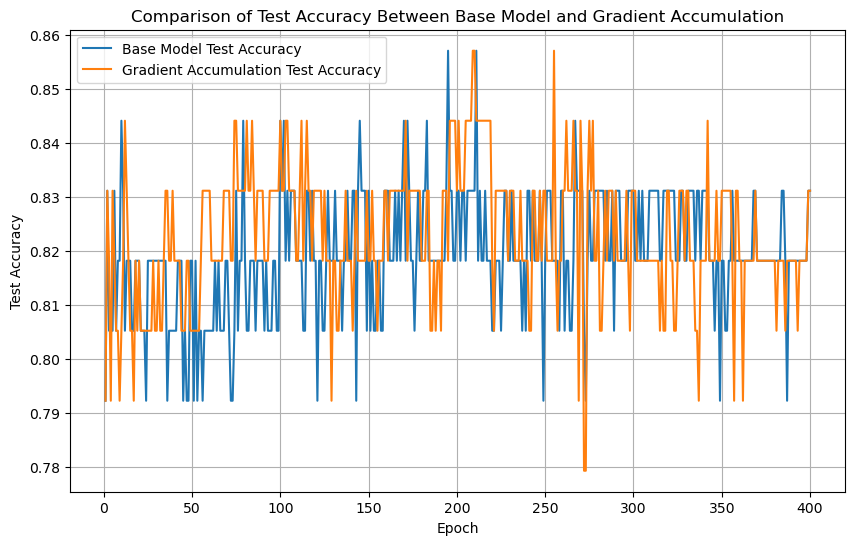

In [47]:
epochs_range = range(1, len(test_accuracies) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, test_accuracies, label='Base Model Test Accuracy')
plt.plot(epochs_range, test_accuracies_ga, label='Gradient Accumulation Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Between Base Model and Gradient Accumulation')
plt.legend()
plt.grid(True)
plt.show()


Early Stopping

In [48]:
def early_stopping(model, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01, patience=50):
    criterion = nn.BCELoss()
    optimizer = optim.RMSprop(model.parameters(), lr=lr)

    best_val_accuracy = 0.0
    best_epoch = 0
    best_model_state = None
    epochs_no_improve = 0

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_correct = 0
        train_total = 0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predicted = torch.round(outputs)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_accuracy = train_correct / train_total
        train_accuracies.append(train_accuracy)

        val_accuracy = evaluate(model, val_loader)
        val_accuracies.append(val_accuracy)

        test_accuracy = evaluate(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}, Train Acc: {train_accuracy:.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = model.state_dict().copy()
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping!")
                break

    return best_epoch, best_val_accuracy, best_model_state, \
           train_accuracies, val_accuracies, test_accuracies


In [49]:
set_seed(44)
model_es = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
best_epoch, best_val_accuracy, best_model_state, \
train_accuracies_es, val_accuracies_es, test_accuracies_es = early_stopping(
    model_es, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01, patience=40)



Epoch 1/400, Train Acc: 0.6705, Val Acc: 0.7368, Test Acc: 0.7922
Epoch 2/400, Train Acc: 0.6998, Val Acc: 0.7632, Test Acc: 0.8312
Epoch 3/400, Train Acc: 0.6982, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 4/400, Train Acc: 0.7227, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 5/400, Train Acc: 0.7292, Val Acc: 0.7763, Test Acc: 0.8052
Epoch 6/400, Train Acc: 0.7357, Val Acc: 0.7763, Test Acc: 0.8312
Epoch 7/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 8/400, Train Acc: 0.7586, Val Acc: 0.7237, Test Acc: 0.8182
Epoch 9/400, Train Acc: 0.7537, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 10/400, Train Acc: 0.7471, Val Acc: 0.7368, Test Acc: 0.8442
Epoch 11/400, Train Acc: 0.7635, Val Acc: 0.7500, Test Acc: 0.8312
Epoch 12/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 13/400, Train Acc: 0.7439, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 14/400, Train Acc: 0.7569, Val Acc: 0.7500, Test Acc: 0.8182
Epoch 15/400, Train Acc: 0.7341, Val Acc: 0.7500, Test Acc: 0.8182
Epoc

In [50]:
final_test_acc_es = test_accuracies_es[-1]
print(final_test_acc_es)

0.7922077922077922


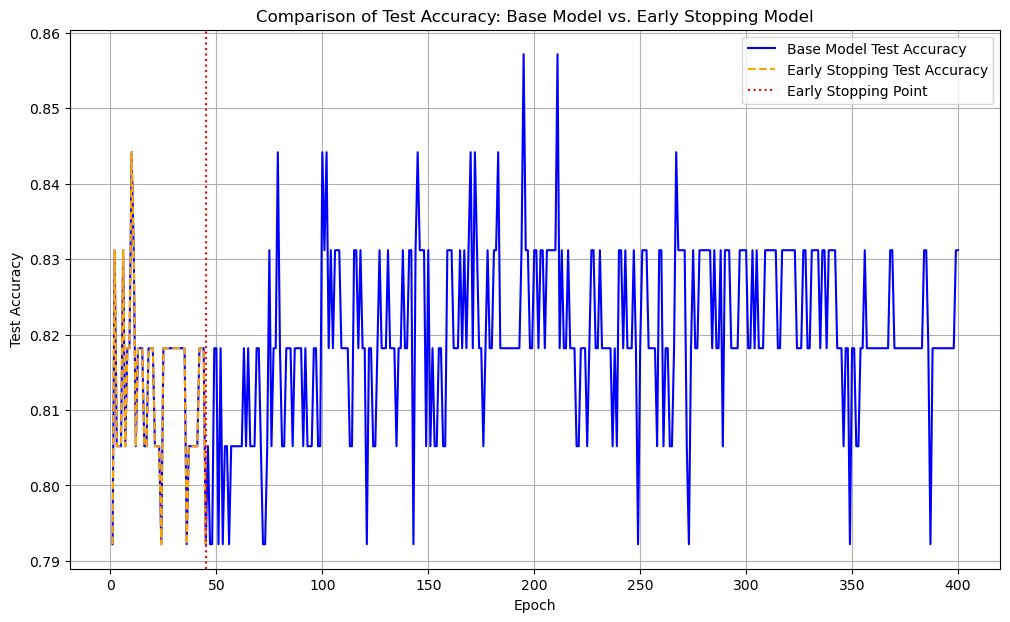

In [51]:

epochs_base = range(1, len(test_accuracies) + 1) 
epochs_es = range(1, len(test_accuracies_es) + 1)      

plt.figure(figsize=(12, 7))

plt.plot(epochs_base, test_accuracies, label='Base Model Test Accuracy', color='blue')

plt.plot(epochs_es, test_accuracies_es, label='Early Stopping Test Accuracy', color='orange', linestyle='--')
plt.axvline(x=len(test_accuracies_es), color='red', linestyle=':', label='Early Stopping Point')

plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy: Base Model vs. Early Stopping Model')

plt.legend()
plt.grid(True)

plt.show()


Learning Rate Scheduler

In [52]:
def learning_rate_scheduler(model, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.RMSprop(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

    best_val_accuracy = 0.0
    best_epoch = 0
    next_epoch_accuracy = 0.0
    next_epoch_recorded = False

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_correct = 0
        train_total = 0
        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predicted = torch.round(outputs)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        scheduler.step()

        train_accuracy = train_correct / train_total
        train_accuracies.append(train_accuracy)

        val_accuracy = evaluate(model, val_loader)
        val_accuracies.append(val_accuracy)

        test_accuracy = evaluate(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}, Train Acc: {train_accuracy:.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = model.state_dict().copy()
            next_epoch_recorded = False

        elif not next_epoch_recorded and epoch == best_epoch + 1:
            next_epoch_accuracy = val_accuracy
            next_epoch_recorded = True

    return best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
           train_accuracies, val_accuracies, test_accuracies


In [53]:
set_seed(44)
model_lr = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
best_epoch, best_val_accuracy, next_epoch_accuracy, best_model_state, \
train_accuracies_lr, val_accuracies_lr, test_accuracies_lr = learning_rate_scheduler(
    model_lr, train_loader, val_loader, test_loader, num_epochs=400, lr=0.01)




Epoch 1/400, Train Acc: 0.6705, Val Acc: 0.7368, Test Acc: 0.7922
Epoch 2/400, Train Acc: 0.6998, Val Acc: 0.7632, Test Acc: 0.8312
Epoch 3/400, Train Acc: 0.6982, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 4/400, Train Acc: 0.7227, Val Acc: 0.7632, Test Acc: 0.8052
Epoch 5/400, Train Acc: 0.7292, Val Acc: 0.7763, Test Acc: 0.8052
Epoch 6/400, Train Acc: 0.7357, Val Acc: 0.7763, Test Acc: 0.8312
Epoch 7/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 8/400, Train Acc: 0.7586, Val Acc: 0.7237, Test Acc: 0.8182
Epoch 9/400, Train Acc: 0.7537, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 10/400, Train Acc: 0.7471, Val Acc: 0.7368, Test Acc: 0.8442
Epoch 11/400, Train Acc: 0.7635, Val Acc: 0.7500, Test Acc: 0.8312
Epoch 12/400, Train Acc: 0.7194, Val Acc: 0.7500, Test Acc: 0.8052
Epoch 13/400, Train Acc: 0.7439, Val Acc: 0.7368, Test Acc: 0.8182
Epoch 14/400, Train Acc: 0.7569, Val Acc: 0.7500, Test Acc: 0.8182
Epoch 15/400, Train Acc: 0.7341, Val Acc: 0.7500, Test Acc: 0.8182
Epoc

In [54]:
final_test_acc_lr = test_accuracies_lr[-1]
print(final_test_acc_lr)

0.8181818181818182


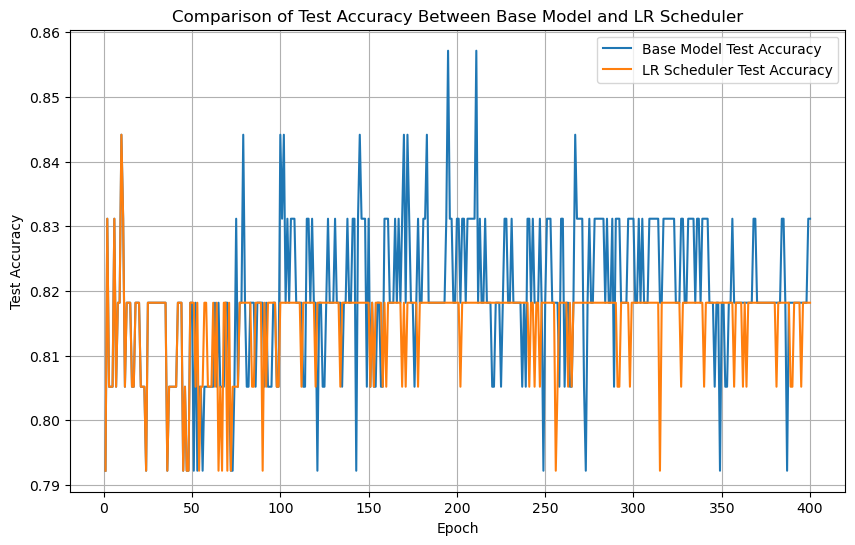

In [55]:
epochs_range = range(1, len(test_accuracies_lr) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, test_accuracies[:len(epochs_range)], label='Base Model Test Accuracy')
plt.plot(epochs_range, test_accuracies_lr, label='LR Scheduler Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Between Base Model and LR Scheduler')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
from sklearn.model_selection import KFold

def kfold_cross_validation(model_class, input_size, test_loader, k=5, num_epochs=400, lr=0.01, batch_size=32):
    kfold = KFold(n_splits=k, shuffle=True, random_state=44)
    
    fold_train_accuracies = []
    fold_val_accuracies = []
    fold_test_accuracies = []
    fold_best_models = []
    fold_test_accuracies_per_epoch = []
    fold_train_losses = []
    fold_val_losses = []
    fold_test_losses = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled)):
        print(f"Fold {fold + 1}/{k}")
        
        X_train_fold = torch.tensor(X_scaled[train_idx], dtype=torch.float32)
        y_train_fold = torch.tensor(y.values[train_idx], dtype=torch.float32)

        X_val_fold = torch.tensor(X_scaled[val_idx], dtype=torch.float32)
        
        y_val_fold = torch.tensor(y.values[val_idx], dtype=torch.float32)

        train_dataset = TensorDataset(X_train_fold, y_train_fold)
        val_dataset = TensorDataset(X_val_fold, y_val_fold)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        model = model_class(input_size=6, hidden_size=64, dropout_rate=0.7)

        optimizer = optim.RMSprop(model.parameters(), lr=lr)
        criterion = nn.BCELoss()

        best_val_acc = 0.0
        best_epoch = 0
        best_model_state = None

        train_accuracies = []
        val_accuracies = []
        test_accuracies_epoch = []
        train_losses = []
        val_losses = []
        test_losses = []

        for epoch in range(num_epochs):
            model.train()
            train_correct = 0
            train_total = 0
            train_loss_epoch = 0.0
            for inputs, labels in train_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                train_loss_epoch += loss.item() * inputs.size(0)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                predicted = torch.round(outputs)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

            train_accuracy = train_correct / train_total
            train_accuracies.append(train_accuracy)
            train_loss_epoch /= len(train_loader.dataset)
            train_losses.append(train_loss_epoch)
            val_accuracy = evaluate(model, val_loader)
            val_accuracies.append(val_accuracy)

            val_loss_epoch = 0.0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs).squeeze()
                    loss = criterion(outputs, labels)
                    val_loss_epoch += loss.item() * inputs.size(0)
            val_loss_epoch /= len(val_loader.dataset)
            val_losses.append(val_loss_epoch)

            test_accuracy_epoch = evaluate(model, test_loader)
            test_accuracies_epoch.append(test_accuracy_epoch)

            test_loss_epoch = 0.0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    outputs = model(inputs).squeeze()
                    loss = criterion(outputs, labels)
                    test_loss_epoch += loss.item() * inputs.size(0)
            test_loss_epoch /= len(test_loader.dataset)
            test_losses.append(test_loss_epoch)

            if val_accuracy > best_val_acc:
                best_val_acc = val_accuracy
                best_epoch = epoch
                best_model_state = model.state_dict().copy()

        print(f"Fold {fold + 1} Best Epoch: {best_epoch}, Best Val Accuracy: {best_val_acc:.4f}")
        
        fold_train_accuracies.append(train_accuracies)
        fold_val_accuracies.append(val_accuracies)
        fold_test_accuracies_per_epoch.append(test_accuracies_epoch)
        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)
        fold_test_losses.append(test_losses)

        model.load_state_dict(best_model_state)
        test_acc = test_accuracy(model, test_loader)
        fold_test_accuracies.append(test_acc)
        fold_best_models.append(best_model_state)

    return fold_train_accuracies, fold_val_accuracies, fold_test_accuracies, fold_best_models, \
           fold_test_accuracies_per_epoch, fold_train_losses, fold_val_losses, fold_test_losses


In [57]:
train_acc_kfold, val_acc_kfold, test_acc_kfold, best_models_kfold, test_acc_kfold_epoch, \
train_losses_kfold, val_losses_kfold, test_losses_kfold = \
    kfold_cross_validation(
    SimpleNN, input_size=input_size, test_loader=test_loader, k=5, num_epochs=400, lr=0.01
)


Fold 1/5
Fold 1 Best Epoch: 40, Best Val Accuracy: 0.7857
Fold 2/5
Fold 2 Best Epoch: 1, Best Val Accuracy: 0.7974
Fold 3/5
Fold 3 Best Epoch: 2, Best Val Accuracy: 0.7974
Fold 4/5
Fold 4 Best Epoch: 16, Best Val Accuracy: 0.7451
Fold 5/5
Fold 5 Best Epoch: 324, Best Val Accuracy: 0.8301


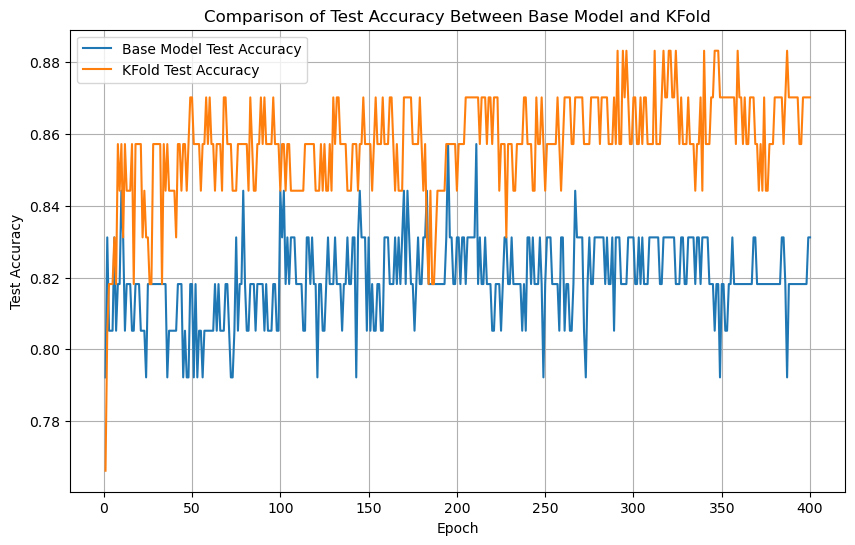

In [61]:

test_acc_kfold_epoch_selected = test_acc_kfold_epoch[3]

epochs_range = range(1, len(test_acc_kfold_epoch_selected) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, test_accuracies[:len(epochs_range)], label='Base Model Test Accuracy')
plt.plot(epochs_range, test_acc_kfold_epoch_selected, label='KFold Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Between Base Model and KFold')
plt.legend()
plt.grid(True)
plt.show()


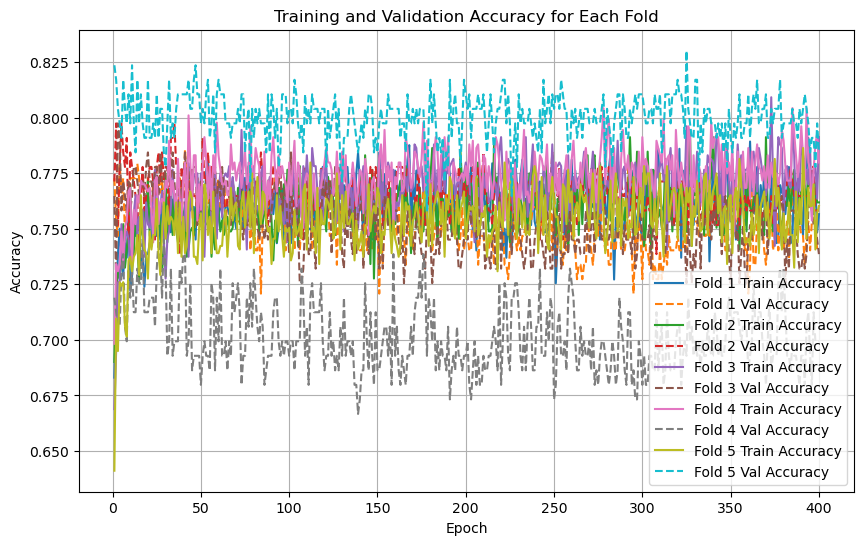

In [62]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(range(1, len(train_acc_kfold[i]) + 1), train_acc_kfold[i], label=f'Fold {i+1} Train Accuracy')
    plt.plot(range(1, len(val_acc_kfold[i]) + 1), val_acc_kfold[i], label=f'Fold {i+1} Val Accuracy', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
print(test_acc_kfold)

[0.7922077922077922, 0.8311688311688312, 0.8311688311688312, 0.8701298701298701, 0.8441558441558441]


In [64]:
best_kfold_accuracy = test_acc_kfold[3]
best_model_state = best_models_kfold[3]
torch.save(best_model_state, 'best_model_part2.pth')

In [65]:
best_model = SimpleNN(input_size=6, hidden_size=64, dropout_rate=0.7)
best_model.load_state_dict(best_model_state)
best_model.eval()

SimpleNN(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.7, inplace=False)
)

In [66]:
all_test_outputs = []
all_test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = best_model(inputs).squeeze()
        all_test_outputs.append(outputs)
        all_test_labels.append(labels)

all_test_outputs = torch.cat(all_test_outputs).numpy()
all_test_labels = torch.cat(all_test_labels).numpy()
test_predictions = np.round(all_test_outputs)

Test Accuracy: 0.8701
Precision: 0.8636
Recall: 0.7308
F1 Score: 0.7917


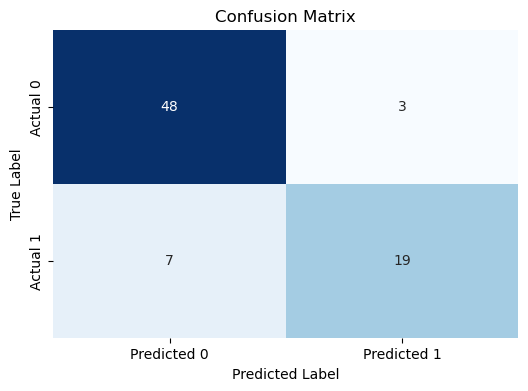

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix as sk_confusion_matrix, roc_curve


accuracy = accuracy_score(all_test_labels, test_predictions)
precision, recall, f1_score_value, _ = precision_recall_fscore_support(
    all_test_labels, test_predictions, average='binary'
)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")

cm = sk_confusion_matrix(all_test_labels, test_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

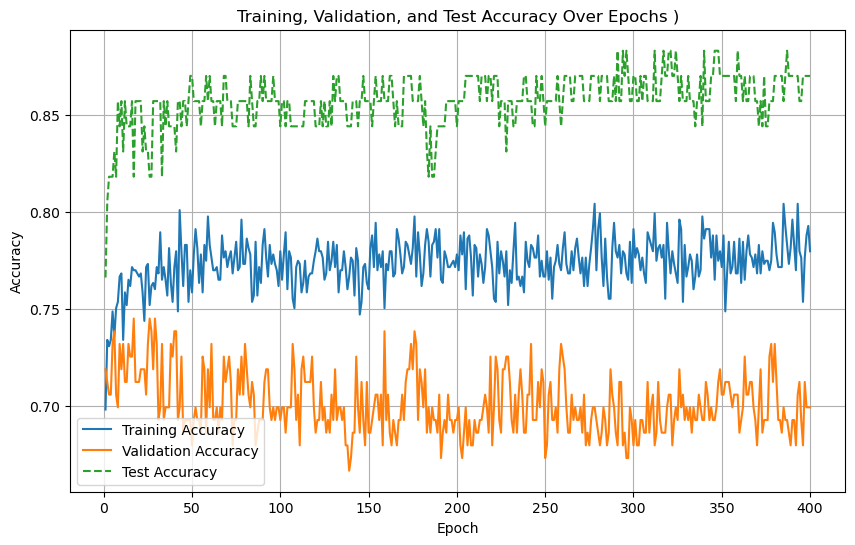

In [68]:
best_fold_index = 3 

epochs_range = range(1, len(train_acc_kfold[best_fold_index]) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_acc_kfold[best_fold_index], label='Training Accuracy')
plt.plot(epochs_range, val_acc_kfold[best_fold_index], label='Validation Accuracy')
plt.plot(epochs_range, test_acc_kfold_epoch[best_fold_index], label='Test Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy Over Epochs )')
plt.legend()
plt.grid(True)
plt.show()


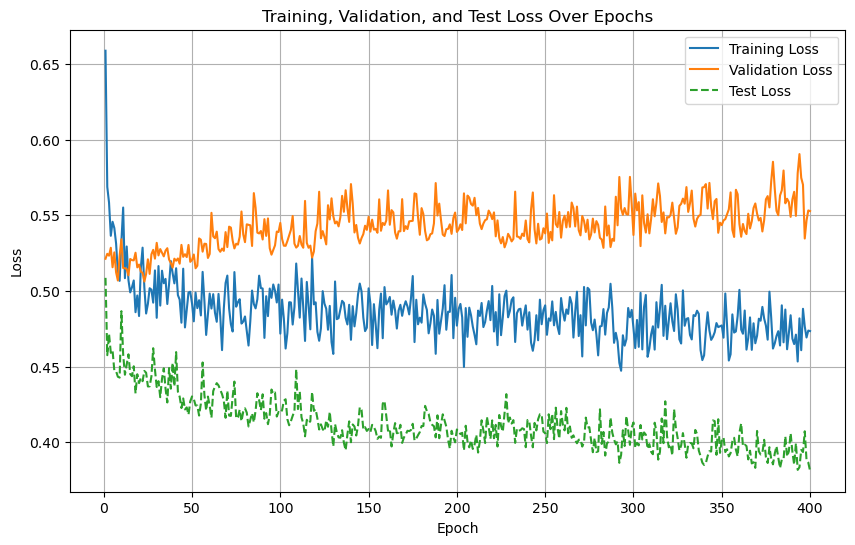

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses_kfold[best_fold_index], label='Training Loss')
plt.plot(epochs_range, val_losses_kfold[best_fold_index], label='Validation Loss')
plt.plot(epochs_range, test_losses_kfold[best_fold_index], label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

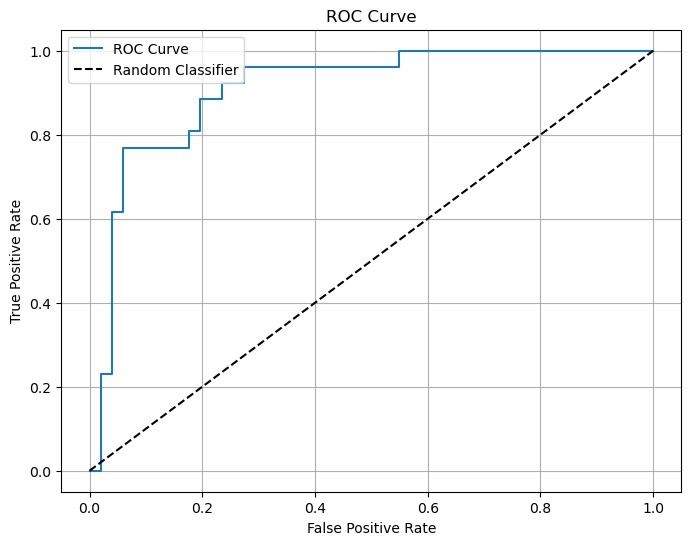

In [70]:

from torchmetrics import ROC




all_test_outputs = torch.tensor(all_test_outputs)  
all_test_labels = torch.tensor(all_test_labels).long()  


roc_metric = ROC(task="binary")

fpr, tpr, thresholds = roc_metric(all_test_outputs, all_test_labels)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

